In [1]:
import os
from dotenv import load_dotenv
import mlflow
from mlflow_utils import get_mlflow_experiment

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt

load_dotenv()

True

In [2]:
# conectar con mlflow y minio (por http)
mlflow.set_tracking_uri("http://127.0.0.1:5000")

os.environ['MLFLOW_S3_ENDPOINT_URL'] = "http://127.0.0.1:9000"
os.environ['AWS_ACCESS_KEY_ID'] = os.getenv('KEY_ID')
os.environ['AWS_SECRET_ACCESS_KEY'] = os.getenv('ACCESS_KEY')

# Logging images experiment

/tmp/ipykernel_4439/3538303537.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


run_id: a620ae72334a45cb99b9abcd46c69d17
experiment_id: 3
status: RUNNING
start_time: 1718807862323
end_time: None
lifecycle_stage: active


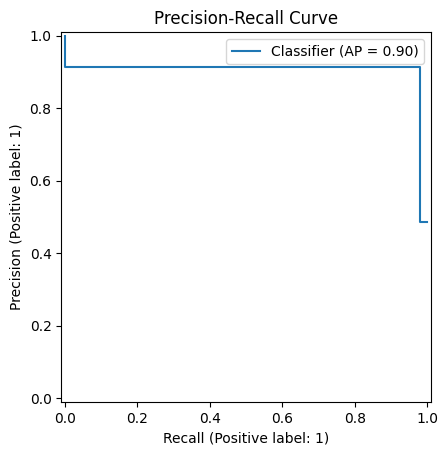

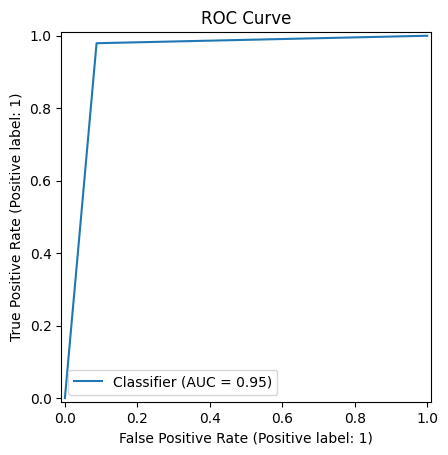

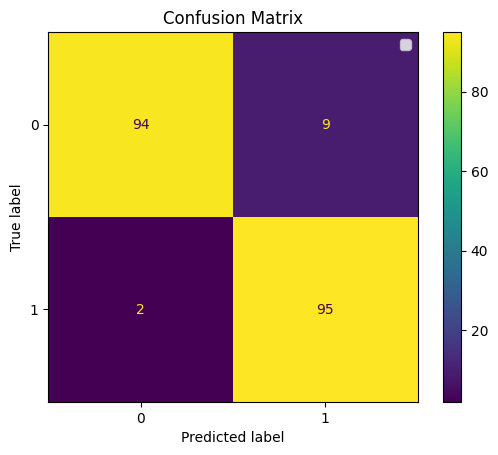

In [3]:
# experiment = get_mlflow_experiment(experiment_name="testing_mlflow")
# print("Name: {}".format(experiment.name))

mlflow.set_experiment("mlflow_tracking")

# with mlflow.start_run(run_name="logging_images", experiment_id=experiment.experiment_id) as run:
with mlflow.start_run(run_name="logging_artifacts11") as run:

    X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

    rfc = RandomForestClassifier(n_estimators=100, random_state=42)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)

    # log the precision-recall curve
    fig_pr = plt.figure()
    pr_display = PrecisionRecallDisplay.from_predictions(y_test, y_pred, ax=plt.gca())
    plt.title("Precision-Recall Curve")
    plt.legend()

    mlflow.log_figure(fig_pr, "metrics/precision_recall_curve.png")

    # log the ROC curve
    fig_roc = plt.figure()
    roc_display = RocCurveDisplay.from_predictions(y_test, y_pred, ax=plt.gca())
    plt.title("ROC Curve")
    plt.legend()

    mlflow.log_figure(fig_roc, "metrics/roc_curve.png")

    # log the confusion matrix
    fig_cm = plt.figure()
    cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=plt.gca())
    plt.title("Confusion Matrix")
    plt.legend()

    mlflow.log_figure(fig_cm, "metrics/confusion_matrix.png")

    # print info about the run
    print("run_id: {}".format(run.info.run_id))
    print("experiment_id: {}".format(run.info.experiment_id))
    print("status: {}".format(run.info.status))
    print("start_time: {}".format(run.info.start_time))
    print("end_time: {}".format(run.info.end_time))
    print("lifecycle_stage: {}".format(run.info.lifecycle_stage))

In [4]:
print('tracking uri:', mlflow.get_tracking_uri())
print('artifact uri:', mlflow.get_artifact_uri())

tracking uri: http://127.0.0.1:5000
artifact uri: s3://mlflow/3/21a72bb646e14597a32519cead41b5bb/artifacts


In [5]:
mlflow.end_run()

In [6]:
print('ok_')

ok_
